# **IPL DATA PRE-PROCESSING**

# What is IPL?

* IPL (Indian Premier League) is world's richest and best T20 cricket league.
* The league was founded by the Board of Control for Cricket in India (BCCI) in 2007.
* This tournament started in 2008 and now has successfully completed 15 editions of the same.

# OBJECTIVES OF DATA PRE-PROCESSING

* I have taken IPL data set for analyzing and getting some precious insights.

* The main idea is to transform the raw data in a useful and efficient format.

Data Pre-processing has following steps:

1) Data Cleaning
2) Data Integration
3) Data Selection
4) Data Transformation
5) Data Mining
6) Evaluation
7) Deployment

* Data preprocessing transforms the data into a format that is more easily and effectively processed in data mining, machine learning and other data science tasks.

* Real-world data is messy and is often created, processed and stored by a variety of humans, business processes and applications.

* As a result, a data set may have some missing individual fields, may contain manual input errors, or have duplicate data or different names to describe the same thing.

# **EDA (EXPLORATORY DATA ANALYSIS)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bbb = pd.read_csv("IPL_Ball-by-Ball_2008-2020[1].csv")
matches = pd.read_csv("IPL Matches 2008-2020.csv")

Prior investigations on data by finding summary statistics.

In [2]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [3]:
bbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [4]:
bbb.corr()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
id,1.000000,0.000300,0.007874,-0.001956,0.028446,-0.018331,0.024763,0.000249,-0.002822
inning,0.000300,1.000000,-0.046512,-0.003879,-0.007301,-0.000545,-0.007472,0.001463,-0.000998
over,0.007874,-0.046512,1.000000,-0.006877,0.086966,-0.001303,0.087345,-0.001185,0.073788
ball,-0.001956,-0.003879,-0.006877,1.000000,0.007168,-0.002487,0.006693,-0.002156,0.004573
batsman_runs,0.028446,-0.007301,0.086966,0.007168,1.000000,-0.140883,0.977587,0.019815,-0.170038
extra_runs,-0.018331,-0.000545,-0.001303,-0.002487,-0.140883,1.000000,0.070707,-0.001777,-0.041352
total_runs,0.024763,-0.007472,0.087345,0.006693,0.977587,0.070707,1.000000,0.019587,-0.180115
non_boundary,0.000249,0.001463,-0.001185,-0.002156,0.019815,-0.001777,0.019587,1.000000,-0.002066
is_wicket,-0.002822,-0.000998,0.073788,0.004573,-0.170038,-0.041352,-0.180115,-0.002066,1.000000


# **DATA PRE-PROCESSING**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
bbb

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [8]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [9]:
print(bbb.shape)
print(matches.shape)

(193468, 18)
(816, 17)


**DROPPING UNNECESSARY COLUMNS**

In [14]:
# percentage of missing values in each column.

matches.isnull().mean() * 100

id                  0.000000
city                1.593137
date                0.000000
player_of_match     0.490196
venue               0.000000
neutral_venue       0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
winner              0.490196
result              0.490196
result_margin       2.083333
eliminator          0.490196
method             97.671569
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [13]:
# In matches dataset, there are 5 columns which are of not much use. They are
# venue, neutral_venue, method, result and eliminator. So, I will drop them.

In [16]:
matches1 = matches.drop(["venue", "neutral_venue", "method", "result", "eliminator"], axis=1)
matches1.head()

,id,city,date,player_of_match,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,140.0,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,33.0,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,9.0,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,5.0,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,5.0,BF Bowden,K Hariharan


**CHECKING THE NUMBER OF EMPTY CELLS IN EACH COLUMN**

In [17]:
matches1.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result_margin      17
umpire1             0
umpire2             0
dtype: int64

**FILLING THE MISSING VALUES IN THE DATASET**

In [18]:
# Now I will fill the missing value in matches dataset, particularly in
# the column of "city" only. It is so because filling other columns will not 
# give us much insights.

In [20]:
# Filling "city" column with "Mumbai" beacuse it is the most occuring value.

matches1 = matches1.fillna({"city": matches1["city"].mode()[0]})
matches1.head()

,id,city,date,player_of_match,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,140.0,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,33.0,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,9.0,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,5.0,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,5.0,BF Bowden,K Hariharan


As you can see, now no missing values are there in city column.

In [21]:
matches1.isnull().sum()

id                  0
city                0
date                0
player_of_match     4
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result_margin      17
umpire1             0
umpire2             0
dtype: int64

In [22]:
# dropping those 4 rows in which player of the match was not there.

matches1=matches1[matches1["player_of_match"].notna()]
matches1.head()

,id,city,date,player_of_match,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,140.0,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,33.0,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,9.0,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,5.0,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,5.0,BF Bowden,K Hariharan


In [23]:
matches1.isnull().sum()

id                  0
city                0
date                0
player_of_match     0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result_margin      13
umpire1             0
umpire2             0
dtype: int64

> We are getting 13 rows in which result_margin is null. This simply means that
> those 13 matches were tied and went to the super over.

**OUTLIER DETECTION**

In [19]:
# Column selected is "result_margin".

df1 = matches1.iloc[:, 9:10]
df2=df1.dropna(axis=0)
df3=df2.sort_values(by="result_margin")
df3

,result_margin
46,1.0
555,1.0
539,1.0
734,1.0
500,1.0
...,...
351,130.0
497,138.0
0,140.0
560,144.0


In [20]:
# finding quartiles.

q1, q2, q3 = np.percentile(df3, [25, 50, 75])
print("Q1 (1st quartile, 25%) is: ", q1)
print("Q2 (2nd quartile, 50%) is: ", q2)
print("Q3 (3rd quartile, 75%) is: ", q3)

Q1 (1st quartile, 25%) is:  6.0
Q2 (2nd quartile, 50%) is:  8.0
Q3 (3rd quartile, 75%) is:  19.5


In [21]:
# Finding Inter-Quartile range (IQR) and limit of outliers.

IQR = q3-q1
print("Inter-Quartile range is: ", IQR)

lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)

print("Lower limit of outliers: ", lower_limit)
print("Upper limit of outliers: ", upper_limit)

Inter-Quartile range is:  13.5
Lower limit of outliers:  -14.25
Upper limit of outliers:  39.75


In [22]:
# Finding upper outliers.
# Finding lower outliers has no significance of this dataset.

upper_outliers = matches1['result_margin'][matches1['result_margin'] > upper_limit]
upper_outliers

0      140.0
9       66.0
18      45.0
37      41.0
41      65.0
       ...  
794     60.0
803     44.0
804     82.0
806     69.0
812     57.0
Name: result_margin, Length: 94, dtype: float64

In [23]:
# There are 94 outliers in this dataset based on result margin column. These are
# actually positive outliers, i.e. the significance for these outliers is -
# These 94 matches were one-sided matches.

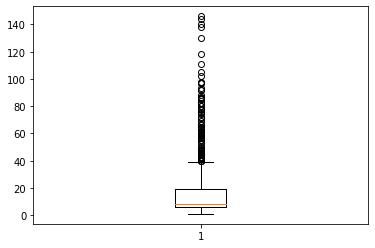

In [24]:
plt.boxplot(df3)
plt.show()

DATA MINING AND DATA VISUALIZATION

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# HOW MANY TOTAL MATCHES HAS BEEN PLAYED TILL NOW IN IPL?

In [26]:
matches.shape[0]

816

**CONCLUSION - From IPL 2008 to 2020, a total of 816 matches has been played.**

# HOW MANY MATCHES ARE ENDED IN A TIE AND WENT FOR A SUPER OVER?

In [27]:
matches1["result_margin"].isnull().sum()

13

**So, 13 matches went for a super over.**

# DATA VISUALIZATION

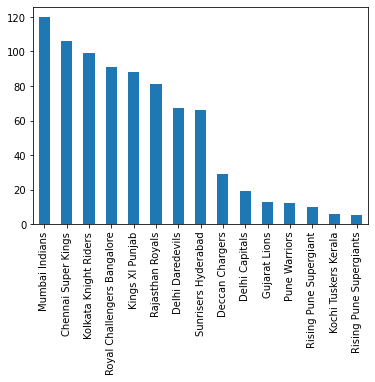

In [30]:
data = matches.winner.value_counts().plot(kind="bar")

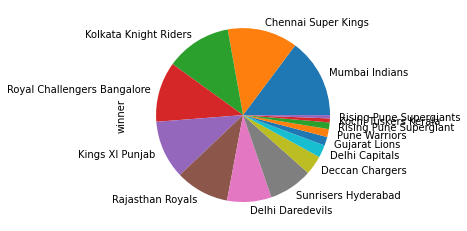

In [31]:
data = matches.winner.value_counts().plot(kind="pie")

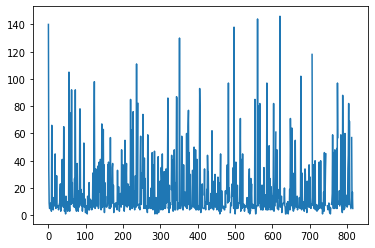

In [32]:
plt.plot(matches["result_margin"])

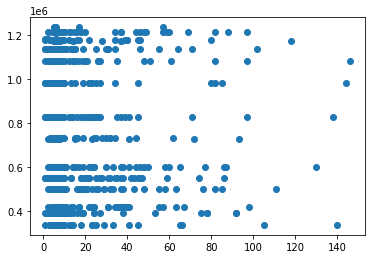

In [33]:
plt.scatter(x=matches1.result_margin, y=matches1.id)

# HAS TOSS WINNING HELPED IN MATCH WINNING?

In [34]:
twmw = matches1[matches1["toss_winner"]==matches1["winner"]]
twmw

,id,city,date,player_of_match,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
1,335983,Chandigarh,2008-04-19,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,33.0,MR Benson,SL Shastri
8,335990,Hyderabad,2008-04-24,YK Pathan,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,3.0,Asad Rauf,MR Benson
10,335992,Bangalore,2008-04-26,SR Watson,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,7.0,MR Benson,IL Howell
12,335994,Mumbai,2008-04-27,AC Gilchrist,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,10.0,Asad Rauf,SL Shastri
14,335996,Bangalore,2008-04-28,MS Dhoni,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,13.0,BR Doctrove,RB Tiffin
...,...,...,...,...,...,...,...,...,...,...,...,...
804,1216540,Sharjah,2020-10-12,AB de Villiers,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,82.0,RK Illingworth,K Srinivasan
806,1216542,Dubai,2020-10-08,JM Bairstow,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,69.0,AK Chaudhary,Nitin Menon
807,1216543,Dubai,2020-10-14,A Nortje,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,13.0,AK Chaudhary,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,6.0,PR Reiffel,S Ravi


In [35]:
perc_twmw = twmw.shape[0]/matches1.shape[0]
perc_twmw

0.5147783251231527

**CONCLUSION - Since, the percentage of toss win match win (twmw) came out to be approx 0.5, we can conclude that toss winning has not much helped in winning the match, as it should be.**

# BOXPLOT FOR EACH TEAM

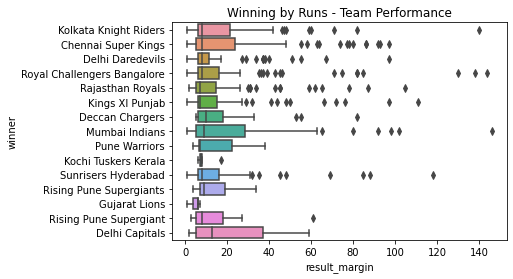

In [36]:
fig, ax = plt.subplots()

ax.set_title("Winning by Runs - Team Performance")

sns.boxplot(y = 'winner', x = 'result_margin', data=matches[matches['result_margin']>0], orient = 'h')
plt.show()

**CONCLUSION - From the above boxplot, we can conclude that RCB is the only team who has won by mig margins maximum number of time**

<AxesSubplot:xlabel='result_margin', ylabel='id'>

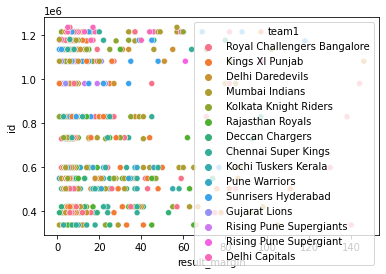

In [37]:
sns.scatterplot(x=matches1.result_margin, y=matches1.id, hue=matches1.team1, legend="full")

# VIOLIN PLOT

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='result_margin'>

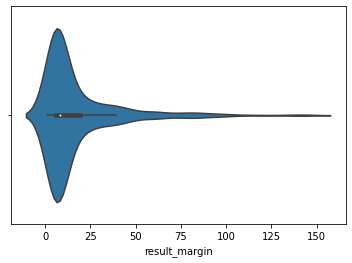

In [38]:
sns.violinplot(matches1.result_margin, orient="h")

# NUMBER OF MATCHES PLAYED AT EACH VENUE

In [39]:
matches["venue"].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

<AxesSubplot:>

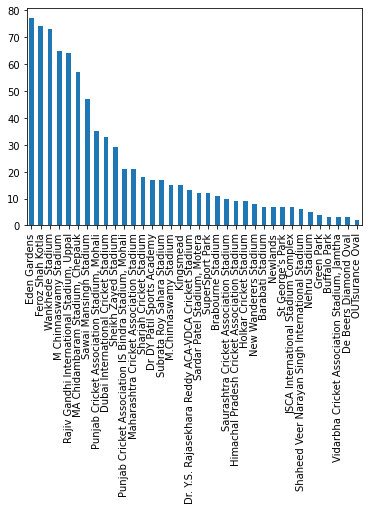

In [40]:
matches["venue"].value_counts().plot(kind="bar")

# WHICH PLAYER WON MAXIMUM MAN OF THE MATCH (MOM) AWARDS?

In [41]:
matches["player_of_match"].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

**CONCLUSION - Hence, ABD has won maximum number of MOM awards till now.**

# IN HOW MANY MATCHES DUCK WORTH LEWIS METHOD HAS BEEN APPLIED?

In [42]:
matches["method"].value_counts()

D/L    19
Name: method, dtype: int64

**CONCLUSION - So, in 19 matches D/L method was used to decide the winner due to varied reasons.**

In [43]:
matches1["city"].value_counts()["Mumbai"]

114

In [44]:
df_new = matches1[matches1["city"]=="Mumbai"]
df_new

,id,city,date,player_of_match,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
3,335985,Mumbai,2008-04-20,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,5.0,SJ Davis,DJ Harper
12,335994,Mumbai,2008-04-27,AC Gilchrist,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,10.0,Asad Rauf,SL Shastri
22,336004,Mumbai,2008-05-04,SM Pollock,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,Mumbai Indians,29.0,IL Howell,RE Koertzen
26,336008,Mumbai,2008-05-07,A Nehra,Mumbai Indians,Rajasthan Royals,Mumbai Indians,field,Mumbai Indians,7.0,DJ Harper,RE Koertzen
36,336018,Mumbai,2008-05-14,ST Jayasuriya,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,9.0,BR Doctrove,AM Saheba
...,...,...,...,...,...,...,...,...,...,...,...,...
719,1178399,Mumbai,2019-04-10,KA Pollard,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Mumbai Indians,3.0,YC Barde,S Ravi
722,1178402,Mumbai,2019-04-13,JC Buttler,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,4.0,Nitin Menon,A Nand Kishore
726,1178406,Mumbai,2019-04-15,SL Malinga,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,Mumbai Indians,5.0,M Erasmus,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,NaN,CK Nandan,S Ravi


In [45]:
df_new["toss_decision"].value_counts()

field    74
bat      40
Name: toss_decision, dtype: int64

**CONCLUSION - It can be concluded that in MUMBAI, maximum number of times (i.e. approx 65%) a team choose to field first after winning the toss.**

In [46]:
df_new.drop(["id", "date", "player_of_match", "result_margin", "umpire1", "umpire2"], axis=1)

,city,team1,team2,toss_winner,toss_decision,winner
3,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
12,Mumbai,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers
22,Mumbai,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,Mumbai Indians
26,Mumbai,Mumbai Indians,Rajasthan Royals,Mumbai Indians,field,Mumbai Indians
36,Mumbai,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians
...,...,...,...,...,...,...
719,Mumbai,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Mumbai Indians
722,Mumbai,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals
726,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,Mumbai Indians
746,Mumbai,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians


In [47]:
df_ = df_new[df_new["toss_decision"]=="field"]
df_

,id,city,date,player_of_match,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
12,335994,Mumbai,2008-04-27,AC Gilchrist,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,10.0,Asad Rauf,SL Shastri
22,336004,Mumbai,2008-05-04,SM Pollock,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,Mumbai Indians,29.0,IL Howell,RE Koertzen
26,336008,Mumbai,2008-05-07,A Nehra,Mumbai Indians,Rajasthan Royals,Mumbai Indians,field,Mumbai Indians,7.0,DJ Harper,RE Koertzen
36,336018,Mumbai,2008-05-14,ST Jayasuriya,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,9.0,BR Doctrove,AM Saheba
39,336021,Mumbai,2008-05-16,SM Pollock,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,8.0,BR Doctrove,DJ Harper
...,...,...,...,...,...,...,...,...,...,...,...,...
710,1175370,Mumbai,2019-04-03,HH Pandya,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,37.0,RJ Tucker,BNJ Oxenford
719,1178399,Mumbai,2019-04-10,KA Pollard,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Mumbai Indians,3.0,YC Barde,S Ravi
722,1178402,Mumbai,2019-04-13,JC Buttler,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,4.0,Nitin Menon,A Nand Kishore
726,1178406,Mumbai,2019-04-15,SL Malinga,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,Mumbai Indians,5.0,M Erasmus,Nitin Menon


In [48]:
df_[df_["toss_winner"]==df_["winner"]].shape

(39, 12)

**CONCLUSION - Hence, out of 74 matches in Mumbai, in which a team won the toss and elected to field first, they won 39 matches.
Therefore, approx 53% of their decision went right.
So, we can say that we can choose anything after winning toss, bat or bowl, it doesn't matter!!**

In [49]:
bbb["fielder"].value_counts()["MS Dhoni"]

164

**MSD has taken 164 catches in IPL till now**

In [50]:
bbb["batsman_runs"].value_counts()

0    77637
1    71937
4    21908
2    12408
6     8902
3      616
5       60
Name: batsman_runs, dtype: int64

In [51]:
bbb["dismissal_kind"].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64